# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

In [3]:
# Будем использовать только обучающую выборку
data = pd.read_csv('googleplaystore.csv', sep=",")

In [4]:
# размер набора данных
data.shape

(10841, 13)

In [5]:
# типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


## 1) Обработка пропусков в данных

### Обработка пропусков в числовых данных

In [9]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%.


In [10]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


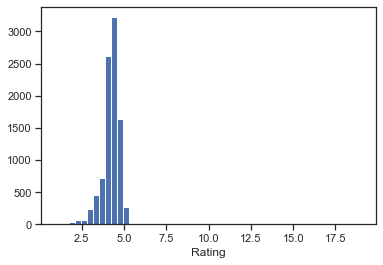

In [11]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [13]:
data_num_Rating = data_num[['Rating']]
data_num_Rating.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [15]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [17]:
strategies=['mean', 'median', 'most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Rating)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4.19333832, 4.19333832, 4.19333832, ..., 4.19333832, 4.19333832,
        4.19333832]))

In [20]:
strategies[1], test_num_impute(strategies[1])

('median', array([4.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3]))

In [21]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([4.4, 4.4, 4.4, ..., 4.4, 4.4, 4.4]))

### Обработка пропусков в категориальных данных

In [22]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [50]:
cat_temp_data = data[['Type']]
cat_temp_data.head()

,Type
0,Free
1,Free
2,Free
3,Free
4,Free


In [51]:
cat_temp_data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [52]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Free'],
       ['Free'],
       ['Free'],
       ...,
       ['Free'],
       ['Free'],
       ['Free']], dtype=object)

## 2) Кодирование категориальных признаков

In [53]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Free
1,Free
2,Free
3,Free
4,Free
...,...
10836,Free
10837,Free
10838,Free
10839,Free


### Кодирование категорий целочисленными значениями

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [55]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [56]:
cat_enc['c1'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [57]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [59]:
le.inverse_transform([0, 1, 2])

array(['0', 'Free', 'Paid'], dtype=object)

## 3) Масштабирование данных¶

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax-масштабирование

In [61]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

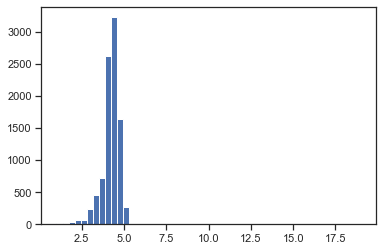

In [62]:
plt.hist(data['Rating'], 50)
plt.show()

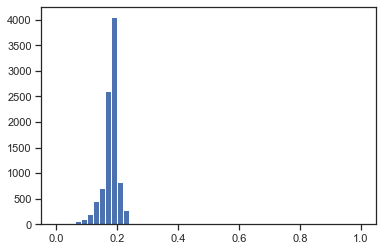

In [63]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [64]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rating']])

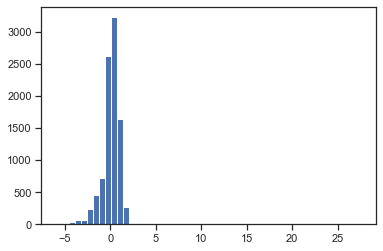

In [65]:
plt.hist(sc2_data, 50)
plt.show()